In [1]:
import requests 
import json
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract
import numpy as np
import pandas as pd
import datetime
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [2]:
def time_msec(time):
    time_split=time.split(':')
    if len(time_split) == 2 :
        sec = int(time_split[0])*60+int(time_split[1])
        return sec*1000
    elif len(time_split) == 3 :
        sec = (int(time_split[0])*60+int(time_split[1]))*60+int(time_split[2])
        return sec*1000

def msec_time(msec):
    sec = msec/1000
    return str(int(sec//60))+':'+str(int(sec%60))

In [3]:
def ocr(frame):
    data=[]

    board=frame[:25,1550:1905]
    length = board.shape[1]
    board=board[:,5:int(length*0.21)]

    sharpening_1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    board = cv2.filter2D(board, -1, sharpening_1)

    fx=4
    fy=4
    board=cv2.resize(board, dsize=(0,0), fx=fx,fy=fy)


    board = cv2.cvtColor(board, cv2.COLOR_RGB2GRAY)

    kernel = np.ones((3,3),np.uint8)


    board = cv2.GaussianBlur(board, (3, 3), 0)
    _, board = cv2.threshold(board, 0, 255,  cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

#     print(pytesseract.image_to_string(board))
    return pytesseract.image_to_string(board)

In [4]:
def ocr2(frame):
    data=[]
    board=frame[:25,1550:1905]
    gray = cv2.cvtColor(board, cv2.COLOR_RGB2GRAY)

    fx=4
    fy=4

    board=cv2.resize(gray, dsize=(0,0), fx=fx,fy=fy)

    img_blur = cv2.GaussianBlur(board, (3,3), 0)
    _, board = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    length = board.shape[1]

#     score = board[:,5:int(length*0.21)]

#     str_score = pytesseract.image_to_string(score)
#     print(str_score)
#     data.append(str_score)

    kda = board[:,int(length*0.32):int(length*0.48)]

    str_kda = pytesseract.image_to_string(kda)
#     print(str_kda)
    data.append(str_kda)
    
    time = board[:,int(length*0.87):]
    str_time = pytesseract.image_to_string(time)
    data.append(str_time)

    return data

In [56]:
# 동영상 프로세싱
import cv2

cap = cv2.VideoCapture('video/full.mp4')

starttime = '38:34'
endtime = '1:15:15'
cap.set(cv2.CAP_PROP_POS_MSEC, time_msec(starttime))

i=0
datalist=[]
while (cap.isOpened):
    i += 1
    ret, frame = cap.read()
    if ret:
        if i%60==0:
#             dt=ocr(frame)
#             dt2=ocr2(frame)
#             data = [dt]+dt2+[cap.get(cv2.CAP_PROP_POS_MSEC)]
            dt = ocr3(frame)
            data = [dt]+[cap.get(cv2.CAP_PROP_POS_MSEC)]
#             if i%600==0:
            print(data)
                
            datalist.append(data)
#             print(cap.get(cv2.CAP_PROP_POS_MSEC)) # 동영상 재생시간
        if cap.get(cv2.CAP_PROP_POS_MSEC) > time_msec(endtime):
            break
    else:
        break

['', 2314984.0]
['', 2315984.0]
['', 2316984.0]
['', 2317984.0]
['', 2318984.0]
['', 2319984.0]
['', 2320984.0]
['', 2321984.0]
['', 2322984.0]
['', 2323984.0]
['', 2324984.0]
['', 2325984.0]
['', 2326984.0]
['', 2327984.0]
['', 2328984.0]
['', 2329984.0]
['', 2330984.0]
['', 2331984.0]
['', 2332984.0]
['', 2333984.0]
['', 2334984.0]
['', 2335984.0]
['', 2336984.0]
['', 2337984.0]
['', 2338984.0]
['', 2339984.0]
['', 2340984.0]
['', 2341984.0]
['', 2342984.0]
['', 2343984.0]
['', 2344984.0]
['', 2345984.0]
['', 2346984.0]
['', 2347984.0]
['', 2348984.0]
['', 2349984.0]
['', 2350984.0]
['', 2351984.0]
['', 2352984.0]
['', 2353984.0]
['', 2354984.0]
['', 2355984.0]
['', 2356984.0]
['', 2357984.0]
['', 2358984.0]
['', 2359984.0]
['', 2360984.0]
['', 2361984.0]
['', 2362984.0]
['', 2363984.0]
['', 2364984.0]
['', 2365984.0]
['', 2366984.0]
['', 2367984.0]
['', 2368984.0]
['', 2369984.0]
['', 2370984.0]
['', 2371984.0]
['', 2372984.0]
['', 2373984.0]
['', 2374984.0]
['', 2375984.0]
['', 237

KeyboardInterrupt: 

In [5]:
img=cv2.imread('video/image (3).jpg')

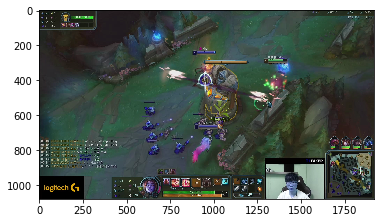

In [7]:
plt.imshow(img)

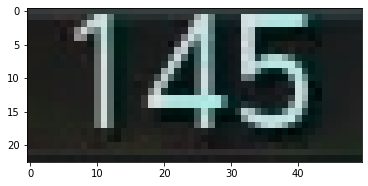

In [31]:
plt.imshow(img[1047:1070,1180:1230])

In [50]:
def ocr3(frame):
#     img=cv2.imread('video/image ('+str(i)+').jpg')
    
    board=frame[1047:1070,1180:1237]
    gray = cv2.cvtColor(board, cv2.COLOR_RGB2GRAY)
    
    fx=4
    fy=4
    board=cv2.resize(gray, dsize=(0,0), fx=fx,fy=fy)
    board = cv2.GaussianBlur(board, (3, 3), 0)
    _, board = cv2.threshold(board, 0, 255,  cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

    # plt.imshow(board)

    # img[1043:1070,1180:1230]
    str_time = pytesseract.image_to_string(board)
    return str_time

In [54]:
ocr3(cv2.imread('video/image (10).jpg'))

'63'